# Apache Spark Concepts

1. The key concept to apache spark is that the code can be executes on multiple cluster machines.  
2. Apache Spark does this by executing functions in paralel on Resilient Distributed Datasets (RDDs)
3. The code uses either RDD, or DataFrame API or SQL API. All parallelizations are hidden from the user and being taken care of by Aapche Spark.  
4. The code gets executed on Apache Spark worker nodes.

# Statistics

In [1]:
from pyspark import SparkContext
import numpy as np
from random import shuffle
import random
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
sc = SparkContext()

In [3]:
a = list(range(100))
# shuffle(a)

In [4]:
print(*a)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99


In [5]:
rdd = sc.parallelize(a)

## Count

In [6]:
rdd.count()

100

## Mean/Average

In [7]:
sum = rdd.sum()
n = rdd.count()
mean = sum/n
print(mean)

49.5


In [50]:
shuffle(a)

In [8]:
rdd.mean()

49.5

## Median

In [52]:
shuffle(a)
print(*a)

69 98 54 28 14 19 11 80 91 84 79 70 50 88 58 65 61 38 1 20 62 77 18 27 73 74 60 40 32 75 30 8 48 71 44 22 76 9 83 4 10 5 45 99 63 43 12 78 66 55 95 26 2 36 90 87 31 6 51 49 21 89 92 24 3 37 46 97 82 13 35 53 67 57 72 93 29 0 68 85 47 52 56 96 59 15 7 39 23 86 16 25 41 33 42 17 94 64 34 81


In [54]:
print(*rdd.sortBy(lambda x: x).zipWithIndex().map(lambda value_key: (value_key[0],value_key[1])).collect())

(0, 0) (1, 1) (2, 2) (3, 3) (4, 4) (5, 5) (6, 6) (7, 7) (8, 8) (9, 9) (10, 10) (11, 11) (12, 12) (13, 13) (14, 14) (15, 15) (16, 16) (17, 17) (18, 18) (19, 19) (20, 20) (21, 21) (22, 22) (23, 23) (24, 24) (25, 25) (26, 26) (27, 27) (28, 28) (29, 29) (30, 30) (31, 31) (32, 32) (33, 33) (34, 34) (35, 35) (36, 36) (37, 37) (38, 38) (39, 39) (40, 40) (41, 41) (42, 42) (43, 43) (44, 44) (45, 45) (46, 46) (47, 47) (48, 48) (49, 49) (50, 50) (51, 51) (52, 52) (53, 53) (54, 54) (55, 55) (56, 56) (57, 57) (58, 58) (59, 59) (60, 60) (61, 61) (62, 62) (63, 63) (64, 64) (65, 65) (66, 66) (67, 67) (68, 68) (69, 69) (70, 70) (71, 71) (72, 72) (73, 73) (74, 74) (75, 75) (76, 76) (77, 77) (78, 78) (79, 79) (80, 80) (81, 81) (82, 82) (83, 83) (84, 84) (85, 85) (86, 86) (87, 87) (88, 88) (89, 89) (90, 90) (91, 91) (92, 92) (93, 93) (94, 94) (95, 95) (96, 96) (97, 97) (98, 98) (99, 99)


In [59]:
rdd_sorted_indexed = rdd.sortBy(lambda x: x).zipWithIndex().map(lambda value_key: (value_key[0],value_key[1]))
n = rdd_sorted_indexed.count()

#median conditional:
median = None
if n % 2 == 1:
    print('odd case')
    median = rdd_sorted_indexed.lookup((n-1)/2)
    print('median:',median)
else:
    print('even case')
    val1 = rdd_sorted_indexed.lookup((n/2)-1)[0]
    val2 = rdd_sorted_indexed.lookup((n/2))[0]
    median = (val1+val2)/2
    print('median:',median)


even case
median: 49.5


## Histogram

In [68]:
rdd.histogram(buckets=(25, 50, 75, 100))

((25, 50, 75, 100), [25, 25, 25])

## Standard Deviation

In [9]:
np.sqrt(rdd.map(lambda x: (x-mean)**2).sum()/n)

28.86607004772212

In [10]:
std = rdd.stdev()

## Skewness

In [11]:
rdd.map(lambda x: (x-mean)**3/std**3).sum()/rdd.count()

7.105427357601002e-17

## Kurtosis  
The higher the kurtosis value, the longer the "tails" of the distributions are. So, kurtosis measures the outlier content. The higher the kurtosis value, the more outliers are in the dataset because the more far a values is away from the mean, the more it contributes to the kurtosis. In other words, the distribution has long tails.

In [12]:
rdd = sc.parallelize([34,1,23,4,3,3,12,4,3,1])

In [13]:
mean = rdd.mean()

In [14]:
std = rdd.stdev()

In [16]:
rdd.map(lambda x: (x-mean)**4/std**4).sum()/(rdd.count())

3.6631240051932736

## pyspark.mllib package

[pyspark.mllib.stat](https://spark.apache.org/docs/2.1.0/mllib-statistics.html)



In [13]:
from pyspark.mllib.stat import Statistics

In [20]:
mat = sc.parallelize(
    [np.array([1.0, 10.0, 100.0]), np.array([2.0, 20.0, 200.0]), np.array([3.0, 30.0, 300.0])]
)  # an RDD of Vectors

# Compute column summary statistics.
summary = Statistics.colStats(mat)
print('mean:', summary.mean())  # a dense vector containing the mean value for each column
print('variance:', summary.variance())  # column-wise variance
print('num of non zeros:', summary.numNonzeros())  # number of nonzeros in each column
print('min:', summary.min())
print('max:', summary.max())

mean: [  2.  20. 200.]
variance: [1.e+00 1.e+02 1.e+04]
num of non zeros: [3. 3. 3.]
min: [  1.  10. 100.]
max: [  3.  30. 300.]


## Covariance and Correlation

In [26]:
rddX = sc.parallelize(random.sample(list(range(100)),100))
rddY = sc.parallelize(random.sample(list(range(100)),100))

In [30]:
print(*rddX.collect())
print('='*60)
print(*rddY.collect())

59 81 24 21 83 2 44 96 45 10 61 50 69 38 14 5 8 48 84 4 99 49 19 58 85 25 86 40 7 82 16 20 80 66 55 37 46 92 29 89 9 35 33 53 52 60 95 31 42 18 98 56 15 39 68 26 0 17 88 87 54 34 28 1 73 74 22 27 32 90 57 76 70 91 13 65 62 47 72 6 51 75 36 78 94 43 77 3 93 71 12 64 63 11 79 30 67 23 41 97
96 45 17 7 86 51 95 21 83 3 13 42 87 72 0 25 85 1 92 22 68 39 9 15 6 53 81 50 20 59 4 57 80 5 23 19 41 82 47 37 67 43 12 55 60 73 44 48 26 33 35 78 84 63 97 93 79 29 46 56 88 16 34 90 32 98 65 38 58 69 52 74 70 94 28 36 99 91 24 62 71 77 61 14 76 64 75 89 27 18 10 54 2 40 49 8 66 11 31 30


### Covariance

In [4]:
meanX = rddX.mean()
meanY = rddY.mean()

rddXY = rddX.zip(rddY)

n = rddXY.count()

covXY = rddXY.map(lambda x_y : (x_y[0]-meanX)*(x_y[1]-meanY)).sum()/n

print('Covariance of XY:', covXY)

Covariance of XY: 3.65


### Correlation  
Covariance is not a normalized measure. Therefore we use it to calculate correlation. But before that we need to calculate the individual standard deviations first

In [6]:
sdX = rddX.stdev()
sdY = rddY.stdev()
print ('Standard Deviation of rddX:', sdX)
print ('Standard Deviation of rddY:',sdY)
corrXY = covXY / (sdX * sdY)
print('Correlation of X and Y:', corrXY)

Standard Deviation of rddX: 2.8722813232690143
Standard Deviation of rddY: 1.7916472867168918
Correlation of X and Y: 0.7092729120837249


In [40]:
# Compute the correlation using Pearson's method. Enter "spearman" for Spearman's method.
# If a method is not specified, Pearson's method will be used by default.
print("Correlation of X and Y:", Statistics.corr(rddX, rddY, method="pearson"))

Correlation of X and Y: 0.18285028502850237


## Filtering

In [23]:
# Filter all the values higher than 50
print(*rdd.filter(lambda x: x>50).collect())

63 90 75 83 57 72 85 53 59 77 51 86 73 99 68 97 93 62 55 70 81 60 84 64 94 58 66 79 87 52 95 98 56 78 67 61 92 82 89 71 74 76 80 96 69 65 91 88 54


In [27]:
# Filter all the values higher than 50 and sort them
print(*rdd.filter(lambda x: x>50).sortBy(lambda x: x).collect())

51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99


In [28]:
# Compute the sum for elements in that list which are greater than 50 but less than 75
rdd.filter(lambda x: x>50).filter(lambda x: x<75).sum()

1500

## Strings

In [39]:
b = ['HALA Bia Inja', 'Despacito', 'Blinding Lights', 'In My Feelings', 'Setting this pyspark and hadoop locally on windows was TOUGH!']
rdd_b =sc.parallelize(b) 

In [40]:
print(rdd_b.map(lambda x: x.lower()).collect())
print('='*60)
print(rdd_b.map(lambda x: x.upper()).collect())
print('='*60)

['hala bia inja', 'despacito', 'blinding lights', 'in my feelings', 'setting this pyspark and hadoop locally on windows was tough!']
['HALA BIA INJA', 'DESPACITO', 'BLINDING LIGHTS', 'IN MY FEELINGS', 'SETTING THIS PYSPARK AND HADOOP LOCALLY ON WINDOWS WAS TOUGH!']


# Creating DataFrames and Registering Query Tables

In [83]:
np.cov([[1,2,3,4,5,6,7,8,9,10],
        [7,6,5,4,5,6,7,8,9,10]])

array([[9.16666667, 4.05555556],
       [4.05555556, 3.56666667]])

In [3]:
from pyspark.sql import SparkSession, Row

In [4]:
spark = SparkSession \
    .builder \
    .appName("Yashar's Sparkity Spark Park Park") \
    .getOrCreate()

In [3]:
spark.sparkContext.getConf().getAll()
#Yes I'm using a Surface Book 2 you macy mac mac 🍎

[('spark.driver.port', '64096'),
 ('spark.app.name', "Yashar's Sparkity Spark Park Park"),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.driver.host', 'SURFACEBOOK-2.fios-router.home'),
 ('spark.master', 'local[*]'),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.app.id', 'local-1583644946791')]

In [4]:
spark

In [5]:
df = spark.createDataFrame([Row(id=1, value='value1'),
                            Row(id=2, value='value2')])

# let's have a look what's inside
df.show()

# let's print the schema
df.printSchema()

+---+------+
| id| value|
+---+------+
|  1|value1|
|  2|value2|
+---+------+

root
 |-- id: long (nullable = true)
 |-- value: string (nullable = true)



In [6]:
# register dataframe as query table
df.createOrReplaceTempView('df_view')

# execute SQL query
df_result = spark.sql('select value from df_view where id=2')

# examine contents of result
df_result.show()

# get result as string
df_result.first().value

+------+
| value|
+------+
|value2|
+------+



'value2'

In [7]:
df.count()

2

## Reading Parquet Files

In [8]:
## create data folder
# !mkdir data

In [13]:
!wget https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
!mv washing.parquet?raw=true data/washing.parquet

--2020-03-08 00:25:28--  https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/IBM/coursera/raw/master/coursera_ds/washing.parquet [following]
--2020-03-08 00:25:28--  https://github.com/IBM/coursera/raw/master/coursera_ds/washing.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/coursera/master/coursera_ds/washing.parquet [following]
--2020-03-08 00:25:28--  https://raw.githubusercontent.com/IBM/coursera/master/coursera_ds/washing.parquet
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.208.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.208.133|:443... connected.
HTTP request sent, awaiting response.

In [5]:
df = spark.read.parquet('data/washing.parquet')

In [6]:
df.count()

2058

In [7]:
df.take(20)

[Row(_id='0d86485d0f88d1f9d60bd193a4306793', _rev='1-57940679fb8a713bc46a033b3c495cbe', count=4, flowrate=11, fluidlevel='acceptable', frequency=None, hardness=77, speed=None, temperature=100, ts=1547808723923, voltage=None),
 Row(_id='0d86485d0f88d1f9d60bd193a4306ee1', _rev='1-15ff3a0b304d789e16a71f4b3e540920', count=2, flowrate=None, fluidlevel=None, frequency=None, hardness=None, speed=1046, temperature=None, ts=1547808729917, voltage=None),
 Row(_id='0d86485d0f88d1f9d60bd193a4307322', _rev='1-97c2742b68c7b07c2091d817e839f693', count=4, flowrate=None, fluidlevel=None, frequency=71, hardness=None, speed=None, temperature=None, ts=1547808731918, voltage=236),
 Row(_id='0d86485d0f88d1f9d60bd193a43080fc', _rev='1-eefb903dbe4574667b7410be306cf741', count=19, flowrate=11, fluidlevel='acceptable', frequency=None, hardness=75, speed=None, temperature=86, ts=1547808738999, voltage=None),
 Row(_id='0d86485d0f88d1f9d60bd193a4308701', _rev='1-5f68b4c72813c25e12d91004ddb33b1b', count=7, flowrate

In [8]:
df.createOrReplaceTempView('washing')

In [9]:
spark.sql("SELECT * FROM washing LIMIT 20").show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

### Box Plot

In [10]:
voltage = spark.sql("SELECT voltage from washing WHERE voltage IS NOT NULL")

In [11]:
type(voltage)

pyspark.sql.dataframe.DataFrame

In [12]:
voltage.count()

448

In [13]:
voltage.take(10)

[Row(voltage=236),
 Row(voltage=235),
 Row(voltage=228),
 Row(voltage=236),
 Row(voltage=233),
 Row(voltage=226),
 Row(voltage=235),
 Row(voltage=220),
 Row(voltage=225),
 Row(voltage=239)]

In [14]:
#getting rid of the Row
#downsampling for visualization - random sampling %10 of the data
voltage.rdd.sample(False, 0.1).map(lambda row: row.voltage).take(10)

[225, 235, 230, 223, 231, 223, 222, 233, 232, 228]

In [15]:

voltage_array = voltage.rdd.sample(False, 0.1).map(lambda row: row.voltage).collect()

In [16]:
type(voltage_array)

list

In [17]:
print(*voltage_array)

236 244 235 227 237 233 226 222 227 232 238 222 226 221 235 223 229 220 222 226 236 224 250 224 225 237 221 225 223 221 227 226 224 234 225 247 231 225 258 228 220 228 233 229 221 238 234 220 238 221 251 234 222 235 223 235 236 228 235 225 220 232


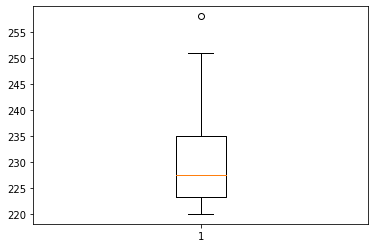

In [18]:
plt.boxplot(voltage_array)
plt.show()


### Run Chart

In [19]:
ts_voltage = spark.sql("SELECT voltage, ts FROM washing\
                        WHERE voltage IS NOT NULL \
                        ORDER BY ts ASC")
ts_voltage_rdd = ts_voltage.rdd.sample(False, 0.1).map(lambda row: (row.ts, row.voltage))

In [27]:
ts = ts_voltage_rdd.map(lambda ts_voltage: ts_voltage[0]).collect()

In [29]:
voltage = ts_voltage_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()

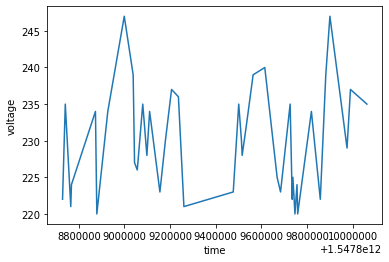

In [30]:
plt.plot(ts, voltage)
plt.xlabel('time')
plt.ylabel('voltage')
plt.show()

### Scatter Plot

In [40]:
htf = spark.sql("SELECT hardness, temperature, flowrate FROM washing\
                        WHERE hardness IS NOT NULL\
                        AND temperature IS NOT NULL\
                        AND flowrate IS NOT NULL")
htf_rdd = htf.rdd.sample(False, 0.1).map(lambda row: (row.hardness, row.temperature, row.flowrate))

In [41]:
htf_rdd.take(10)

[(76, 88, 11),
 (78, 89, 11),
 (79, 93, 11),
 (78, 82, 11),
 (79, 91, 11),
 (70, 94, 11),
 (70, 85, 11),
 (73, 92, 11),
 (79, 87, 11),
 (76, 99, 11)]

In [42]:
hardness = htf_rdd.map(lambda h_t_f: h_t_f[0]).collect()
temperature = htf_rdd.map(lambda h_t_f: h_t_f[1]).collect()
flowrate = htf_rdd.map(lambda h_t_f: h_t_f[2]).collect()

In [46]:
print('hardness: \n',*hardness)
print('temperature: \n', *temperature)
print('flowrate: \n', *flowrate)

hardness: 
 76 78 79 78 79 70 70 73 79 76 78 76 78 71 72 75 72 76 76 73 105 75 80 71 79 97 70 70 72 77 74 75 72 79 150 78 76 78 70 70 75 72 74 71 86 71 74 78 71 73 75 79 78 105 79 73 79 79 105 110 73 77 175 74 76 75 78 75 76 78 77 73 74 78 105 85 79 74 130 74 71 74 71 175 72 150 74 70 79 88 75 89 98 80 77 71 73 73 79 170 75 73 76 77 75 76 72 70 78 175 71 80 77 80 73 123 98 77 79 77 160 70 71 72 71 74 77 79 75 72 78 78 70 160 74 84 74 76 71 74 79
temperature: 
 88 89 93 82 91 94 85 92 87 99 87 99 96 90 94 96 96 97 86 87 91 87 95 88 86 90 90 99 97 99 83 91 87 88 82 81 99 88 98 81 81 84 84 100 88 97 84 100 95 80 91 84 81 97 94 85 83 85 88 94 95 87 89 94 82 89 99 95 84 93 82 82 95 81 84 97 96 100 80 95 88 86 81 80 82 83 87 91 87 88 88 90 94 81 86 95 83 96 84 92 93 99 95 88 85 87 81 96 93 90 84 81 82 81 99 95 86 82 89 93 87 95 87 91 100 100 92 83 86 85 87 97 85 94 90 96 87 80 98 86 90
flowrate: 
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11

Text(0.5, 0, 'flowrate')

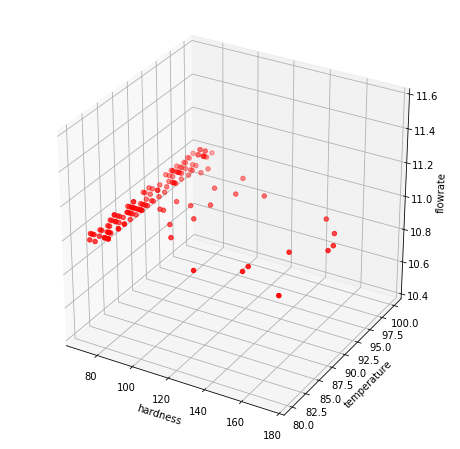

In [53]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hardness, temperature, flowrate, c='r', marker='o')
ax.set_xlabel('hardness')
ax.set_ylabel('temperature')
ax.set_zlabel('flowrate')

### Histogram

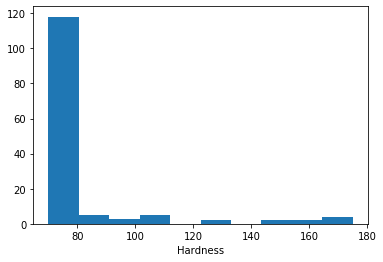

In [55]:
plt.hist(hardness)
plt.xlabel('Hardness');

## Dimensionality Reduction - PCA

In [56]:
df.show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

In [58]:
result = spark.sql("""
SELECT * from (
                SELECT
                min(temperature) over w as min_temperature,
                max(temperature) over w as max_temperature, 
                min(voltage) over w as min_voltage,
                max(voltage) over w as max_voltage,
                min(flowrate) over w as min_flowrate,
                max(flowrate) over w as max_flowrate,
                min(frequency) over w as min_frequency,
                max(frequency) over w as max_frequency,
                min(hardness) over w as min_hardness,
                max(hardness) over w as max_hardness,
                min(speed) over w as min_speed,
                max(speed) over w as max_speed
                FROM washing 
                WINDOW w AS (ORDER BY ts ROWS BETWEEN CURRENT ROW AND 10 FOLLOWING) 
              )
                WHERE min_temperature is not null 
                AND max_temperature is not null
                AND min_voltage is not null
                AND max_voltage is not null
                AND min_flowrate is not null
                AND max_flowrate is not null
                AND min_frequency is not null
                AND max_frequency is not null
                AND min_hardness is not null
                AND min_speed is not null
                AND max_speed is not null                                   
                   """)

In [59]:
result.show()

+---------------+---------------+-----------+-----------+------------+------------+-------------+-------------+------------+------------+---------+---------+
|min_temperature|max_temperature|min_voltage|max_voltage|min_flowrate|max_flowrate|min_frequency|max_frequency|min_hardness|max_hardness|min_speed|max_speed|
+---------------+---------------+-----------+-----------+------------+------------+-------------+-------------+------------+------------+---------+---------+
|             81|            100|        221|        223|          11|          11|           68|           76|          71|          78|     1033|     1033|
|             81|            100|        221|        223|          11|          11|           68|           76|          72|          78|     1033|     1033|
|             81|            100|        221|        223|          11|          11|           68|           76|          72|          80|     1033|     1033|
|             81|            100|        222|       

In [61]:
#importing libraries
from pyspark.ml.feature import PCA
# from pyspark.ml.linalg import Vectors #Vectors for the data structure expected by PCA
from pyspark.ml.feature import VectorAssembler #to transform data into these vector structures

In [63]:
assembler = VectorAssembler(inputCols=result.columns, outputCol='features')

In [67]:
#transform the data
features = assembler.transform(result)

In [68]:
#how the new column looks like
features.rdd.map(lambda r : r.features).take(10)

[DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 71.0, 78.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 72.0, 78.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 72.0, 80.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 72.0, 80.0, 1033.0, 1046.0]),
 DenseVector([81.0, 100.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1033.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1033.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 71.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 71.0, 74.0, 73.0, 80.0, 1046.0, 1046.0])]

In [71]:
pca = PCA(k=3, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(features)
result_pca = model.transform(features).select("pcaFeatures")
print('count:', result_pca.count())
result_pca.show(truncate=False)

count: 2051
+-----------------------------------------------------------+
|pcaFeatures                                                |
+-----------------------------------------------------------+
|[1459.9789705814187,-18.745237781780922,70.78430794796873] |
|[1459.995481828676,-19.11343146165273,70.72738871425986]   |
|[1460.0895843561282,-20.969471062922928,70.75630600322052] |
|[1469.6993929419532,-20.403124647615513,62.013569674880955]|
|[1469.7159041892107,-20.771318327487293,61.95665044117209] |
|[1469.7128317338704,-20.790751117222456,61.896106678330966]|
|[1478.3530264572928,-20.294557029728722,71.67550104809607] |
|[1478.3530264572928,-20.294557029728722,71.67550104809607] |
|[1478.3686036138165,-20.260626897636314,71.63355353606426] |
|[1478.3686036138165,-20.260626897636314,71.63355353606426] |
|[1483.5412027684088,-20.006222577501354,66.82710394284209] |
|[1483.5171090223353,-20.867020421583753,66.86707301954084] |
|[1483.4224268542928,-19.87574823665505,66.93027077913985]

In [72]:
rdd = result_pca.rdd.sample(False,0.8)
x = rdd.map(lambda a : a.pcaFeatures).map(lambda a : a[0]).collect()
y = rdd.map(lambda a : a.pcaFeatures).map(lambda a : a[1]).collect()
z = rdd.map(lambda a : a.pcaFeatures).map(lambda a : a[2]).collect()

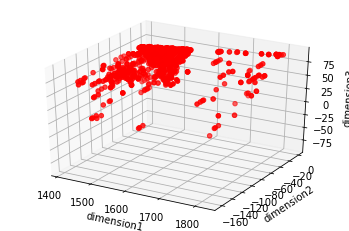

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')




ax.scatter(x,y,z, c='r', marker='o')

ax.set_xlabel('dimension1')
ax.set_ylabel('dimension2')
ax.set_zlabel('dimension3')

plt.show()
# We can see two clusters in the data set. We can also see a third cluster which either can be outliers or a real cluster.